In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
1,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
2,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
3,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
4,29/06/2020,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27395,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27396,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27397,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27398,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)
covid.drop("geoId",axis=1,inplace=True)

In [6]:
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,03/07/2020,186,33,Afghanistan,Asia
1,02/07/2020,319,28,Afghanistan,Asia
2,01/07/2020,279,13,Afghanistan,Asia
3,30/06/2020,271,12,Afghanistan,Asia
4,29/06/2020,351,18,Afghanistan,Asia
...,...,...,...,...,...
27395,25/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent
0,03/07/2020,186,33,Afghanistan,Asia
1,02/07/2020,319,28,Afghanistan,Asia
2,01/07/2020,279,13,Afghanistan,Asia
3,30/06/2020,271,12,Afghanistan,Asia
4,29/06/2020,351,18,Afghanistan,Asia
...,...,...,...,...,...
27395,25/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent
27399,21/03/2020,1,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27395,25/03/2020,0,0,Zimbabwe,Africa
...,...,...,...,...,...
4,29/06/2020,351,18,Afghanistan,Asia
3,30/06/2020,271,12,Afghanistan,Asia
2,01/07/2020,279,13,Afghanistan,Asia
1,02/07/2020,319,28,Afghanistan,Asia


In [10]:
covid1.head()

,date,cases,deaths,country,continent
27399,21/03/2020,1,0,Zimbabwe,Africa
27398,22/03/2020,1,0,Zimbabwe,Africa
27397,23/03/2020,0,0,Zimbabwe,Africa
27396,24/03/2020,0,1,Zimbabwe,Africa
27395,25/03/2020,0,0,Zimbabwe,Africa


In [11]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,continent
11991,31/12/2019,0,0,India,Asia
11990,01/01/2020,0,0,India,Asia
11989,02/01/2020,0,0,India,Asia
11988,03/01/2020,0,0,India,Asia
11987,04/01/2020,0,0,India,Asia
...,...,...,...,...,...
11811,29/06/2020,19459,380,India,Asia
11810,30/06/2020,18522,418,India,Asia
11809,01/07/2020,18653,507,India,Asia
11808,02/07/2020,19148,434,India,Asia


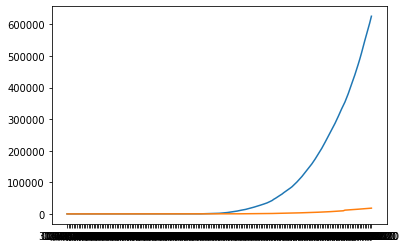

In [12]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

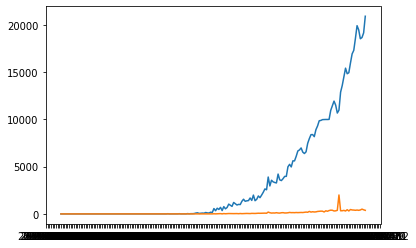

In [13]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

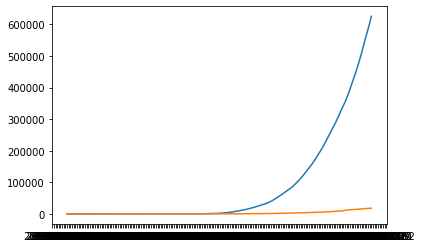

In [14]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_cumulative.png")

In [15]:
India

,date,cases,deaths,country,continent
11991,31/12/2019,0,0,India,Asia
11990,01/01/2020,0,0,India,Asia
11989,02/01/2020,0,0,India,Asia
11988,03/01/2020,0,0,India,Asia
11987,04/01/2020,0,0,India,Asia
...,...,...,...,...,...
11811,29/06/2020,19459,380,India,Asia
11810,30/06/2020,18522,418,India,Asia
11809,01/07/2020,18653,507,India,Asia
11808,02/07/2020,19148,434,India,Asia


In [16]:
India.to_csv("India_covid.csv", index=False)

In [17]:
India_covid = pd.read_csv("India_covid.csv")
India_covid

,date,cases,deaths,country,continent
0,31/12/2019,0,0,India,Asia
1,01/01/2020,0,0,India,Asia
2,02/01/2020,0,0,India,Asia
3,03/01/2020,0,0,India,Asia
4,04/01/2020,0,0,India,Asia
...,...,...,...,...,...
180,29/06/2020,19459,380,India,Asia
181,30/06/2020,18522,418,India,Asia
182,01/07/2020,18653,507,India,Asia
183,02/07/2020,19148,434,India,Asia


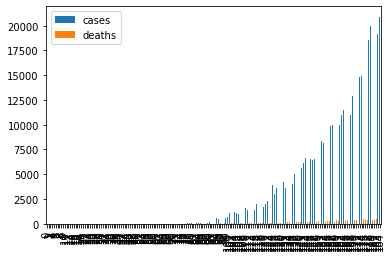

In [18]:
India_covid.plot.bar()

In [19]:
India_covid.drop("country",axis=1,inplace=True)
India_covid.drop("continent",axis=1,inplace=True)
India_covid

,date,cases,deaths
0,31/12/2019,0,0
1,01/01/2020,0,0
2,02/01/2020,0,0
3,03/01/2020,0,0
4,04/01/2020,0,0
...,...,...,...
180,29/06/2020,19459,380
181,30/06/2020,18522,418
182,01/07/2020,18653,507
183,02/07/2020,19148,434


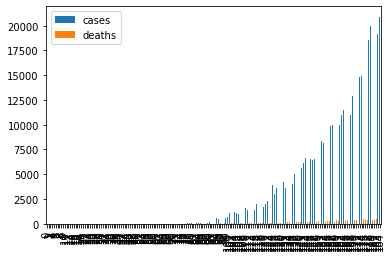

In [20]:
India_covid.plot.bar()

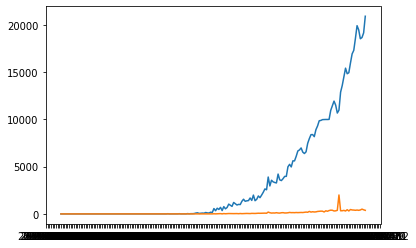

In [21]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_daily.png")

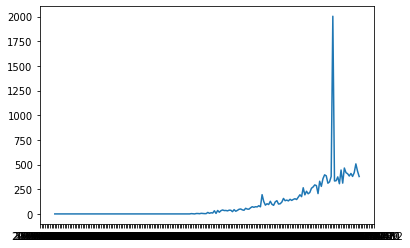

In [22]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
#y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
#plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("deaths_daily.png")

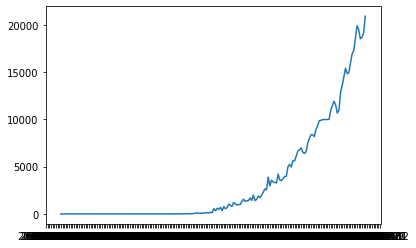

In [23]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
#z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
#plt.plot(x_values, z_values)
plt.savefig("cases_daily.png")